# Dynamic Mode Decomposition (DMD) and Multi-Resolution
Decoding hand movements from ECoG recordings

##Installation
```Bash
git clone https://github.com/BruntonUWBio/ecog-hand
sudo apt-get install python3-pip
sudo pip3 install numpy matplotlib cvxpy pytest sklearn
```
##Usage

In your project, load the required modules:

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from mrDMD import mrDMD
from DMD import DMD
from helperFunctions import *

Start with a signal composed of a sum of sinusoids in 1-dimension

Freqs: 
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]


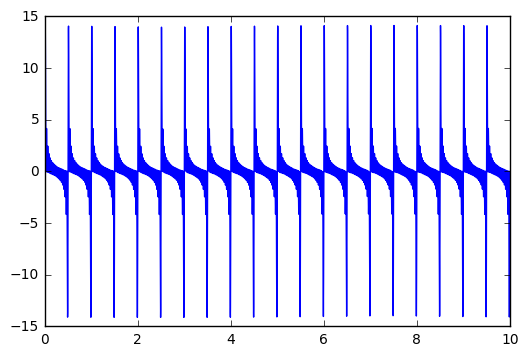

In [2]:
dt = .001
N = 5000
t = np.linspace(0, 10, N)
amp = 1
freq_max = 40
freqs = np.arange(freq_max)
freqs = freqs[::2]
print('Freqs: ')
print(freqs)

X = buildX(freqs, t)
plt.figure()
plt.plot(t, X[0,:])
plt.show()

Comparisons to FFT when frequency well below Nyquist

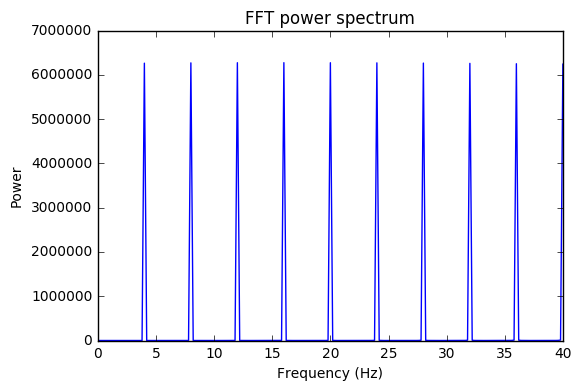

In [3]:
freq, P = fftPlot(X, dt, freq_max)

In [5]:
stack_factor = 2*len(freqs)
kwargs = {'dt':dt, 
    'scale_modes':True}
dmd = DMD(**kwargs)
dmd.fit(X)
f, P = dmd.spectrum(sort=True)
plt.figure()
plt.stem(f, P)
plt.title('DMD spectrum')
plt.xlabel('Frequency')
plt.show()
plt.close()

idx = inRange(f, (1,freq_max))
plt.figure()
plt.stem(f[idx], P[idx])
plt.title('DMD spectrum shortened')
plt.xlabel('Frequency')
plt.show()
plt.close()

MemoryError: 

## Testing

Pytest is used for testing run the following at the command line

```Bash
pytest
```